# **Análisis de componentes principales**

    Lorena Pérez
    Luz Arévalo

## Clima en Canadá

In [1]:
#Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Lectura de datos
path = 'https://raw.githubusercontent.com/LuzAr123/Data_Science/main/ds/weather.csv'
wr = pd.read_csv(path, sep=',', header=0)
wr.shape

(35, 13)

#### 1. Exploración de datos

In [3]:
# a) Búsqueda de datos faltantes
wr.isna().sum()

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
station    0
dtype: int64

In [4]:
# b) Tipo de datos
wr.dtypes

0          float64
1          float64
2          float64
3          float64
4          float64
5          float64
6          float64
7          float64
8          float64
9          float64
10         float64
11         float64
station     object
dtype: object

<AxesSubplot: >

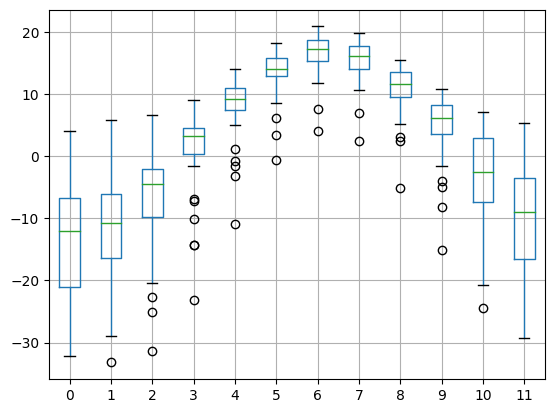

In [5]:
# c) Distribución de los datos
wr.boxplot()

Los datos no requieren tratamiento de datos faltantes. El comportamiento de la temperatura promedio mensual se atribuye a las estaciones del año.

#### 2. Descomposición SVD

In [44]:
# a) Extracción de los nombres de las estaciones
station = wr.values[:,-1]

# b) Convertir los datos a una matriz

W = wr.values[:,:12].astype(np.float32)
print('La estructura de la matriz W es de:', W.shape,'\nEl tipo de objeto es:',type(W))

['St. John’s' 'Charlottetown' 'Halifax' 'Sydney' 'Yarmouth' 'Fredericton'
 'Arvida' 'Montreal' 'Quebec City' 'Schefferville' 'Sherbrooke'
 'Kapuskasing' 'London' 'Ottawa' 'Thunder Bay' 'Toronto' 'Churchill'
 'The Pas' 'Winnipeg' 'Prince Albert' 'Regina' 'Beaverlodge' 'Calgary'
 'Edmonton' 'Kamloops' 'Prince George' 'Prince Rupert' 'Vancouver'
 'Victoria' 'Dawson' 'Whitehorse' 'Frobisher Bay' 'Inuvik' 'Resolute'
 'Yellowknife']
La estructura de la matriz W es de: (35, 12) 
El tipo de objeto es: <class 'numpy.ndarray'>


In [7]:
# c) Cálculo del vector de medias
print(np.round(W.mean(axis=0),2))

[-14.17 -11.84  -6.94   0.9    7.97  13.43  16.44  15.35  10.45   4.37
  -3.4  -10.63]


In [8]:
# d) Centralización y estandarización de la matriz

mu = W.mean(axis=0)
std = W.std(axis=0)
Wc = (W - mu) / std

In [9]:
# e) Verificar que la media actual sea igual que cero (o muy cercano a cero)
print(np.round(Wc.mean(axis=0),2))

[ 0.  0.  0.  0. -0.  0.  0. -0. -0.  0. -0.  0.]


In [10]:
# f) Descomposición SVD de la matriz centrada

pcamodel = PCA(n_components=12)

# g) Proyección de los datos
pca = pcamodel.fit_transform(Wc)
pca.shape

(35, 12)

In [11]:
# h) Varianza explicada por componente principal
np.round(pcamodel.explained_variance_ratio_,2)

array([0.85, 0.12, 0.02, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  ], dtype=float32)

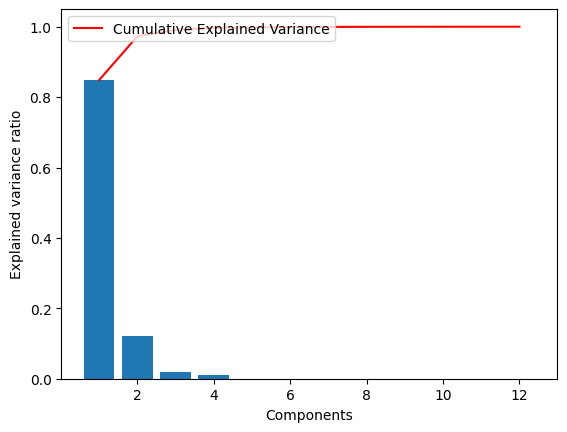

In [12]:
# i) Varianza explicada por componente principal
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),np.round(pcamodel.explained_variance_ratio_,2))
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')
plt.show()

#### 3. Proyección de los datos

In [13]:
# a) Definición del gráfico dos componentes principales
def mybiplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

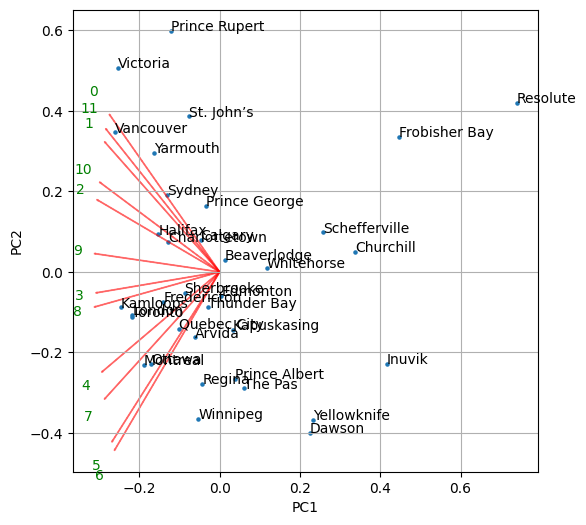

In [14]:
# b) Proyección bidimensional
plt.figure(figsize=(6,6))
mybiplot(pca[:,0:2], np.transpose(pcamodel.components_[0:2, :]), list(wr.columns[:-1]))

sclx = 1/(max(pca[:,0])-min(pca[:,0]))
scly = 1/(max(pca[:,1])-min(pca[:,1]))

for i in range(0, pca.shape[0]):
    plt.annotate(station[i], (pca[i,0]*sclx, pca[i,1]*scly))
plt.show()

Mientras más a la derecha ses encuentren los datos más fríos suelen ser sus inviernos, hacia la izquierda más cálidos sus inviernos.

#### 4. Curvas de longitud

In [15]:
# a) Matriz de los componentes principales
components = pcamodel.components_.T
print(np.round(components, 2))

[[-0.27  0.39 -0.17  0.4  -0.27 -0.13 -0.03 -0.12 -0.3  -0.08  0.55 -0.29]
 [-0.28  0.32  0.28  0.27  0.3  -0.21 -0.15  0.41  0.33 -0.08  0.11  0.46]
 [-0.3   0.18  0.28  0.05  0.22  0.48  0.21  0.15  0.2   0.26 -0.11 -0.57]
 [-0.3  -0.05  0.46 -0.25  0.23  0.14  0.2  -0.25 -0.58 -0.17  0.12  0.27]
 [-0.29 -0.25  0.45 -0.12 -0.32 -0.28 -0.23 -0.41  0.44 -0.09  0.06 -0.18]
 [-0.27 -0.42  0.12  0.32 -0.5   0.09  0.    0.36 -0.25  0.36 -0.17  0.19]
 [-0.26 -0.44 -0.26  0.28  0.22  0.28 -0.19  0.05  0.03 -0.64 -0.05 -0.11]
 [-0.28 -0.31 -0.34  0.07  0.47 -0.13 -0.07 -0.29  0.06  0.56  0.22  0.09]
 [-0.31 -0.09 -0.24 -0.16 -0.08 -0.36  0.77  0.15  0.17 -0.17 -0.04 -0.02]
 [-0.31  0.05 -0.16 -0.57  0.03 -0.25 -0.44  0.42 -0.24  0.01 -0.06 -0.26]
 [-0.3   0.22 -0.32 -0.33 -0.33  0.54 -0.05 -0.12  0.26  0.02  0.12  0.39]
 [-0.28  0.35 -0.15  0.21  0.   -0.15 -0.09 -0.35 -0.13  0.   -0.75  0.05]]


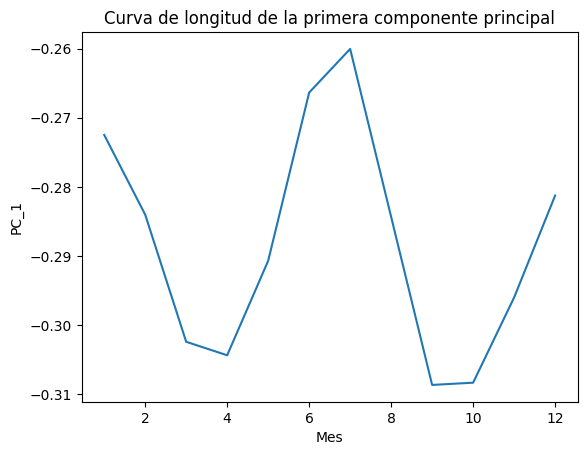

In [33]:
# b) Primera componente principal
plt.plot(range(1,13),components[:,0],"-")
plt.xlabel('Mes') 
plt.ylabel('PC_1') 
  
plt.title("Curva de longitud de la primera componente principal")
plt.show()

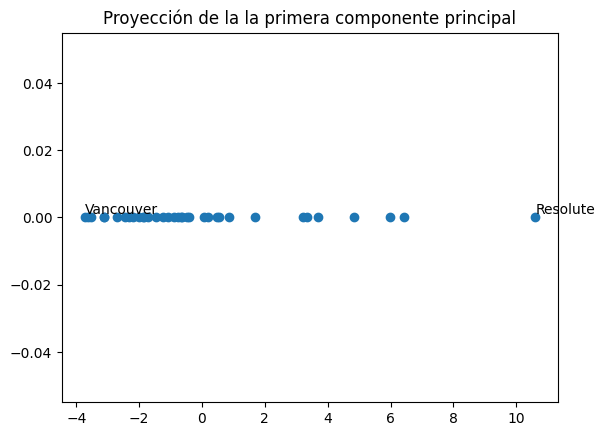

In [62]:
# c) Proyección de la primera componente principal
plt.scatter(pca[:,0], np.zeros(pca[:,0].shape))

for i in range(0, pca.shape[0]):
    if i== pca[:,0].tolist().index(max(pca[:,0])):
        plt.annotate(station[i],(pca[i,0],0.001))
    else:
        if i== pca[:,0].tolist().index(min(pca[:,0])):
            plt.annotate(station[i], (pca[i,0], 0.001))

plt.title("Proyección de la primera componente principal")
plt.show()

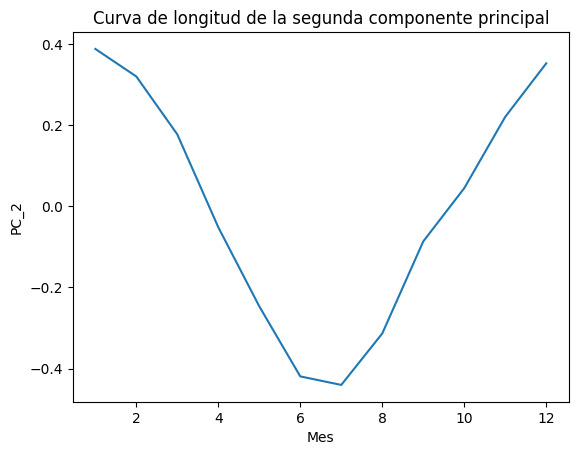

In [65]:
# d) Segunda componente principal
plt.plot(range(1,13),components[:,1],"-")
plt.xlabel('Mes') 
plt.ylabel('PC_2') 
  
plt.title("Curva de longitud de la segunda componente principal")
plt.show()

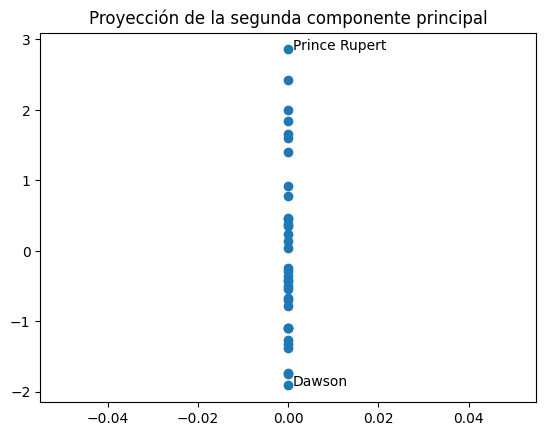

In [69]:
# e) Proyección de la segunda componente principal
plt.scatter(np.zeros(pca[:,1].shape),pca[:,1])

for i in range(0, pca.shape[0]):
    if i== pca[:,1].tolist().index(max(pca[:,1])):
        plt.annotate(station[i],(0.001,pca[i,1]))
    else:
        if i== pca[:,1].tolist().index(min(pca[:,1])):
            plt.annotate(station[i], (0.001,pca[i,1]))

plt.title("Proyección de la segunda componente principal")
plt.show()

## Actos Delictivos EE. UU.

In [18]:
#Lectura de datos
path = 'https://raw.githubusercontent.com/LuzAr123/Data_Science/main/ds/crimes.dat'
ad = pd.read_csv(path, sep=',', header=0)
ad.shape

(7, 9)

#### 1. Exploración de datos

In [19]:
# a) Tipo de datos
ad.dtypes

Crime     object
 No.       int64
 1       float64
 2       float64
 3       float64
 4       float64
 5       float64
 6       float64
 7       float64
dtype: object

In [20]:
# c) Matriz de correlación
X= np.array(ad.iloc[:,2:])
print('La matriz de correlación de los crimenes:\n',X)

crime = ad.iloc[:,0].tolist()
n=X.shape[0]

La matriz de correlación de los crimenes:
 [[1.   0.52 0.34 0.81 0.28 0.06 0.11]
 [0.52 1.   0.55 0.7  0.68 0.6  0.44]
 [0.34 0.55 1.   0.56 0.62 0.44 0.62]
 [0.81 0.7  0.56 1.   0.52 0.32 0.33]
 [0.28 0.68 0.62 0.52 1.   0.8  0.7 ]
 [0.06 0.6  0.44 0.32 0.8  1.   0.55]
 [0.11 0.44 0.62 0.33 0.7  0.55 1.  ]]


#### 2. Inferencia de la distancia

In [21]:
# a) Matriz de distancias
D=np.ones((n,n))-X
print('La matriz de distancias de los crimenes:\n',D)

La matriz de distancias de los crimenes:
 [[0.   0.48 0.66 0.19 0.72 0.94 0.89]
 [0.48 0.   0.45 0.3  0.32 0.4  0.56]
 [0.66 0.45 0.   0.44 0.38 0.56 0.38]
 [0.19 0.3  0.44 0.   0.48 0.68 0.67]
 [0.72 0.32 0.38 0.48 0.   0.2  0.3 ]
 [0.94 0.4  0.56 0.68 0.2  0.   0.45]
 [0.89 0.56 0.38 0.67 0.3  0.45 0.  ]]


In [22]:
# b) Matriz de proyección 
A = np.eye(n) - (1./n)*np.ones((n,n))
print('La matriz de proyección:\n',
      np.array(np.round(A,2)))

La matriz de proyección:
 [[ 0.86 -0.14 -0.14 -0.14 -0.14 -0.14 -0.14]
 [-0.14  0.86 -0.14 -0.14 -0.14 -0.14 -0.14]
 [-0.14 -0.14  0.86 -0.14 -0.14 -0.14 -0.14]
 [-0.14 -0.14 -0.14  0.86 -0.14 -0.14 -0.14]
 [-0.14 -0.14 -0.14 -0.14  0.86 -0.14 -0.14]
 [-0.14 -0.14 -0.14 -0.14 -0.14  0.86 -0.14]
 [-0.14 -0.14 -0.14 -0.14 -0.14 -0.14  0.86]]


In [23]:
# c) Construcción de la matriz de Gram
G = -0.5* A @ D @ A
print('La matriz de Gram:\n',
      np.array(np.round(G,2)))

La matriz de Gram:
 [[ 0.34  0.   -0.06  0.17 -0.12 -0.18 -0.15]
 [ 0.    0.15 -0.05  0.01 -0.02 -0.   -0.08]
 [-0.06 -0.05  0.2  -0.03 -0.03 -0.06  0.03]
 [ 0.17  0.01 -0.03  0.18 -0.08 -0.13 -0.12]
 [-0.12 -0.02 -0.03 -0.08  0.13  0.09  0.04]
 [-0.18 -0.   -0.06 -0.13  0.09  0.25  0.02]
 [-0.15 -0.08  0.03 -0.12  0.04  0.02  0.25]]


#### 3. Descomposición SVD

In [24]:
# a) Descomposición de la matriz de Gram
U, S, V = np.linalg.svd(G)
print('La matriz de componentes:\n',
      np.array(np.round(V,2)))

La matriz de componentes:
 [[-0.64 -0.09  0.07 -0.43  0.28  0.42  0.38]
 [ 0.   -0.38  0.58 -0.01 -0.17 -0.51  0.48]
 [-0.36  0.36  0.65  0.01 -0.1  -0.01 -0.55]
 [ 0.22 -0.74  0.24  0.05  0.18  0.41 -0.38]
 [-0.3  -0.11 -0.12  0.38  0.72 -0.44 -0.13]
 [ 0.43  0.15  0.11 -0.72  0.42 -0.25 -0.14]
 [ 0.38  0.38  0.38  0.38  0.38  0.38  0.38]]


#### 3. Proyección bidimensional

In [25]:
# a) Proyección de las primeras dos componentes
V2 = D @ V.T[:,:2]
print('Primeras dos componentes:\n',
      np.array(np.round(V2,2)))

Primeras dos componentes:
 [[ 0.86  0.03]
 [ 0.07  0.27]
 [-0.16 -0.34]
 [ 0.56  0.04]
 [-0.47  0.14]
 [-0.66  0.35]
 [-0.6  -0.27]]


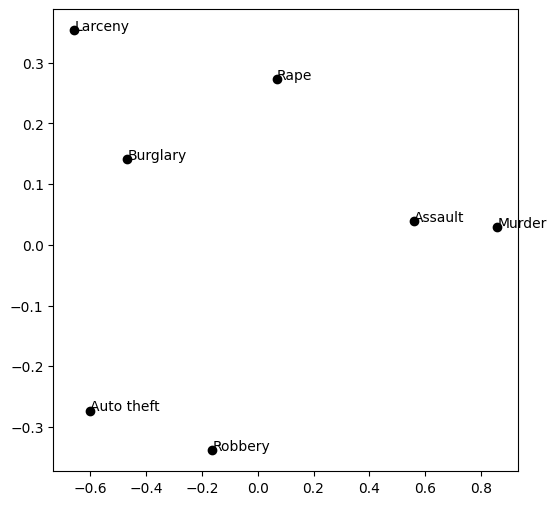

In [26]:
# b) Visualización de los datos
plt.figure(figsize=(6,6))
plt.plot(V2[:,0], V2[:,1], 'ko')
for i in np.arange(0, V2.shape[0]):
    plt.annotate(crime[i], (V2[i,0], V2[i,1]))
plt.show()